# **INTRODUCTION**


**L’arrhythmie cardiaque est une condition qui se caractérise par un battement du cœur irrégulier, ce qui peut mener à des complications graves, telles que des AVC ou des insuffisances cardiaques. La détection précoce des arythmies est cruciale pour améliorer la prise en charge des patients et prévenir de graves problèmes de santé.**

**C'est donc pour cette raison que nous allons utiliser le jeu de données MIT-BIH Arrhythmia, qui contient des enregistrements ECG (électrocardiogramme) provenant de patients, afin de classifier les arythmies cardiaques à l'aide d'un réseau de neurone récurents (LSTM) et un MLP classique. Le jeu de données comporte des signaux ECG qui ont été étiquetés selon différents types d'arythmies cardiaques : PVC, LBB, RBB et Pacemaker.**

**L'objectif de ce mini projet est de classer les types d'arythmies cardiaques présentes dans les signaux ECG à partir du jeu de données MIT-BIH Arrhythmia et comparer les deux approches : MLP et LSTM**

**Plan du rapport**

**- Visualiation des données et préparation des données**

**- Entrainement avec un MLP classique**

**- Entrainement avec un réseau récurent :  LSTM**


**- Comparaison finale et conclusion**

**Fait par : Lucas ETIENNE et Clément HIBLOT-MERY**

# **Visualisation et préparation des données**


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical


#Chargement des données
data = pd.read_csv("DataSet/mitbih_train.csv", header=None)

In [2]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


**On peut ainsi remarquer que le jeu d'entrainement est composé de 87554 lignes avec des données de type float**

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


**On peut voir qu'il n'y a pas l'air d'y avoir de données abbérantes, les min et max sont proches de la moyenne. De plus, count correpond bien à notre nombre de lignes, ce qui signifie qu'il n'y a pas de données manquantes**

**Afin de vérifier qu'il n'y a pas de valeurs manquantes, nous pouvons utiliser la méthode ci-dessous**

In [5]:
data.isnull().sum()


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

**On n'aura donc pas besoins de générer de nouvelles valeurs, passons maintenant à la préparation et transformation des données**

**Dans un premier temps, nous allons extraire toutes les colonnes sauf la dernière (les features), et retourner ces features sous forme d'un tableau NumPy**

In [48]:
# Fonction pour transformer les features (X) et enlever la variable cible activity à prédire (y)
def feature_transformer(data):
     # 187 colonnes du signal
    return data.iloc[:, :-1].values  # Retourner uniquement les features (X)

**On va maintenant convertir la variable cible en encodage one-hot.**

In [7]:
def target_transformer(data):
    # data est un DataFrame complet ; on en extrait la dernière colonne
    y = data.iloc[:, -1].values
    return to_categorical(y, num_classes=5)  # Encode les labels en one-hot

**Pour finir, on définit des pipelines de prétraitement pour les variables d'entrée (X) et les labels cibles (y)**

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split

# ——— Pipelines ———
X_pipeline = Pipeline([
    ('features', FunctionTransformer(feature_transformer, validate=False)),
    ('scaler',   StandardScaler()),
])

y_pipeline = Pipeline([
    ('onehot', FunctionTransformer(target_transformer, validate=False)),
])

In [9]:
# ——— Split train / test sur le DataFrame complet ———
df_train, df_test = train_test_split(
    data,
    test_size=0.2,
    stratify=data.iloc[:, -1],
    random_state=42
)

In [10]:
# ——— Transformation ———
X_train = X_pipeline.fit_transform(df_train)
y_train = y_pipeline.fit_transform(df_train)

X_test  = X_pipeline.transform(df_test)
y_test  = y_pipeline.transform(df_test)

**Enfin, on va re dimensionner les données afin qu'elles soient adaptées au LSTM qui attend des données sous la forme [n_samples, n_timesteps, n_features]**

In [11]:
# ———  Reshape pour LSTM ———
# shape initiale de X_train : (n_samples, 187)
X_train_lstm = X_train.reshape(-1, X_train.shape[1], 1)
X_test_lstm  = X_test.reshape(-1, X_test.shape[1], 1)

print("X_train.shape        =", X_train.shape)
print("y_train.shape        =", y_train.shape)
print("X_train_lstm.shape   =", X_train_lstm.shape)

X_train.shape        = (70043, 187)
y_train.shape        = (70043, 5)
X_train_lstm.shape   = (70043, 187, 1)


**On a donc nos données pour l'entrainement avec le MLLP et le réseau de neurones récurrents qui sont bien dimensionnées et bien préparées**

## **Entrainement avec un MLP classique**


In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(187,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model_mlp.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7904 - loss: 0.7269 - val_accuracy: 0.9198 - val_loss: 0.2726
Epoch 2/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9052 - loss: 0.3576 - val_accuracy: 0.9325 - val_loss: 0.2174
Epoch 3/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.9164 - loss: 0.3058 - val_accuracy: 0.9423 - val_loss: 0.1928
Epoch 4/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.9242 - loss: 0.2785 - val_accuracy: 0.9486 - val_loss: 0.1802
Epoch 5/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.9310 - loss: 0.2498 - val_accuracy: 0.9494 - val_loss: 0.1709
Epoch 6/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.9317 - loss: 0.2426 - val_accuracy: 0.9568 - val_loss: 0.1584
Epoch 7/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9369 - loss: 0.2299 - val_accuracy: 0.9558 - val_loss: 0.1593
Epoch 8/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9340 - loss: 0.2333 - val_

**Nous allons maintenant faire une matrice de confusion afin d'analyser nos résultats**

548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step


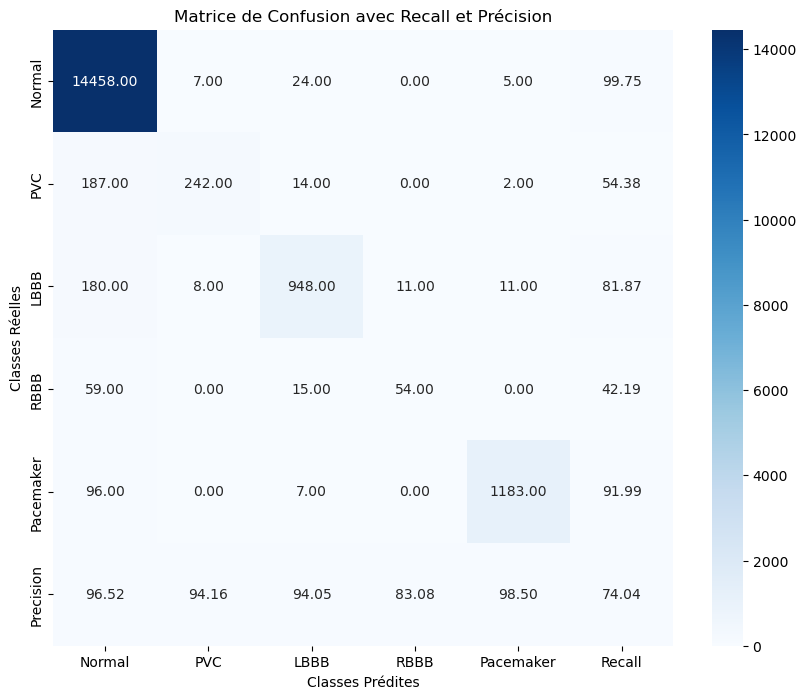

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Classes pour le dataset MIT-BIH Arrhythmia (5 classes)
labels = ["Normal", "PVC", "LBBB", "RBBB", "Pacemaker"]

# Si y_test est en format one-hot, le convertir en indices de classe
if y_test.ndim > 1:  
    y_test_classes = np.argmax(y_test, axis=1)  
else:
    y_test_classes = y_test  


y_pred = model_mlp.predict(X_test)

# Convertir les prédictions en indices de classe 
y_pred_classes = np.argmax(y_pred, axis=1) 

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calcul des métriques (précision et rappel)
precision = np.diag(cm) / np.sum(cm, axis=0) * 100  
recall = np.diag(cm) / np.sum(cm, axis=1) * 100  

# Ajout du rappel en dernière colonne et de la précision en dernière ligne
cm_extended = np.zeros((len(labels) + 1, len(labels) + 1))  
cm_extended[:-1, :-1] = cm  
cm_extended[:-1, -1] = recall  # Dernière colonne = Recall
cm_extended[-1, :-1] = precision  # Dernière ligne = Précision
cm_extended[-1, -1] = np.mean(recall)  # Moyenne du rappel pour la dernière case 

# Création des étiquettes 
extended_labels = labels + ["Recall"]
extended_labels_h = labels + ["Precision"]

# Affichage avec Seaborn 
plt.figure(figsize=(10, 8))
sns.heatmap(cm_extended, annot=True, fmt=".2f", cmap='Blues', xticklabels=extended_labels, yticklabels=extended_labels_h)
plt.title("Matrice de Confusion avec Recall et Précision")
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

**Au final, on peut voir assez nettement, que notre modele arrive très bien à classer les individus normaux avec une accuracy de 96%. En revanche, on a un peu du mal à détecter la maladie RBB, en effet, on pense que cela vient du fait qu'on a moins d' observation pour celle-ci, cela explique une accuracy inférieur (83%). Notre DataSet n'est pas assez équilibré**

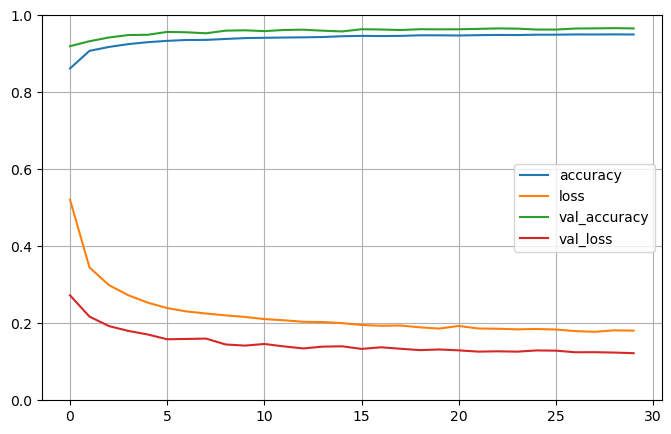

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Pour finir, on peut observer que notre modèle généralise bien avec une courbe de validation qui est légèrement supérieure à celle de l'accuracy. On a donc pas de sur-apprentissage**

## **Entrainement avec un réseau de neurones récurent :  LSTM**


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

**Pour l'entrainement avec le réseau de neurones récurents, nous avons fait le choix de faire de l'optimisation des hyper paramètres en combinant Keras avec scikit-learn.**

In [69]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def build_model(units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(
    model=build_model,
    units=64,
    dropout_rate=0.5,
    optimizer="adam",
    epochs=10,
    batch_size=128,
    verbose=0
)

param_dist = {
    "units": [32, 64, 128],
    "dropout_rate": [0.3, 0.5, 0.7],
    "batch_size": [64, 128],
    "epochs": [5, 10]
}

search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=3, verbose=2)
history=search.fit(X_train_lstm, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.5, epochs=5, units=32; total time=  42.5s


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.5, epochs=5, units=32; total time=  42.5s


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.5, epochs=5, units=32; total time=  42.7s


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, dropout_rate=0.3, epochs=5, units=64; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, dropout_rate=0.3, epochs=5, units=64; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, dropout_rate=0.3, epochs=5, units=64; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.3, epochs=5, units=64; total time= 1.5min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.3, epochs=5, units=64; total time= 1.5min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.3, epochs=5, units=64; total time= 1.5min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.5, epochs=10, units=128; total time= 7.1min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.5, epochs=10, units=128; total time= 7.0min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=128, dropout_rate=0.5, epochs=10, units=128; total time= 6.5min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, dropout_rate=0.7, epochs=5, units=64; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, dropout_rate=0.7, epochs=5, units=64; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, dropout_rate=0.7, epochs=5, units=64; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Nous avons fait lechoix d'optimiser la taille du LSTM, le taux de dropOut et la batch_size**

In [78]:

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs paramètres trouvés : ", search.best_params_)

Meilleurs paramètres trouvés :  {'units': 128, 'epochs': 10, 'dropout_rate': 0.5, 'batch_size': 128}


In [106]:
# Afficher les résultats du meilleur modèle trouvé
best_model = search.best_estimator_

**On lance maintenant l'entrainement avec le meilleur modèle trouvé**

In [84]:
history = best_model.model_.fit(X_train_lstm, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - accuracy: 0.8840 - loss: 0.4044 - val_accuracy: 0.9082 - val_loss: 0.3439
Epoch 2/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - accuracy: 0.8922 - loss: 0.3854 - val_accuracy: 0.9158 - val_loss: 0.3252
Epoch 3/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 63s 72ms/step - accuracy: 0.9105 - loss: 0.3452 - val_accuracy: 0.9258 - val_loss: 0.2913
Epoch 4/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 64s 73ms/step - accuracy: 0.9225 - loss: 0.3152 - val_accuracy: 0.9213 - val_loss: 0.3008
Epoch 5/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.9277 - loss: 0.2921 - val_accuracy: 0.9300 - val_loss: 0.2700
Epoch 6/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 60s 69ms/step - accuracy: 0.9269 - loss: 0.2962 - val_accuracy: 0.9342 - val_loss: 0.2618
Epoch 7/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 70s 80ms/step - accuracy: 0.9328 - loss: 0.2722 - val_accuracy: 0.9345 - val_loss: 0.2490
Epoch 8/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - accuracy: 0.9330 - loss: 0.2656 - 

**Analysons maintenant nos résultats avec une matrice de confusion et les courbes d'apprentissage**

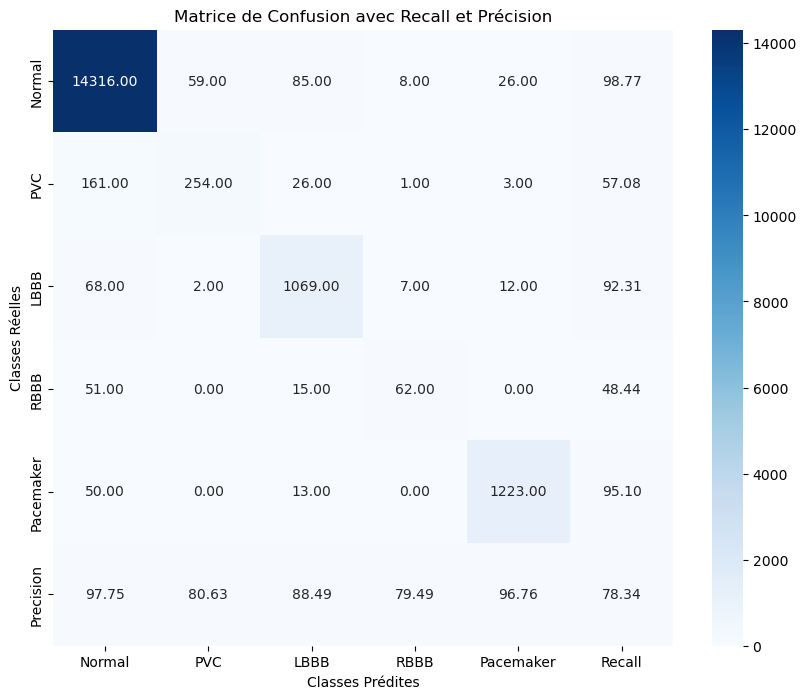

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Classes pour le dataset MIT-BIH Arrhythmia (5 classes)
labels = ["Normal", "PVC", "LBBB", "RBBB", "Pacemaker"]

# Si y_test est en format one-hot, le convertir en indices de classe
if y_test.ndim > 1:  
    y_test_classes = np.argmax(y_test, axis=1)  
else:
    y_test_classes = y_test  


y_pred = best_model.predict(X_test_lstm)

# Convertir les prédictions en indices de classe 
y_pred_classes = np.argmax(y_pred, axis=1) 

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calcul des métriques (précision et rappel)
precision = np.diag(cm) / np.sum(cm, axis=0) * 100  
recall = np.diag(cm) / np.sum(cm, axis=1) * 100  

# Ajout du rappel en dernière colonne et de la précision en dernière ligne
cm_extended = np.zeros((len(labels) + 1, len(labels) + 1))  
cm_extended[:-1, :-1] = cm  
cm_extended[:-1, -1] = recall  # Dernière colonne = Recall
cm_extended[-1, :-1] = precision  # Dernière ligne = Précision
cm_extended[-1, -1] = np.mean(recall)  # Moyenne du rappel pour la dernière case 

# Création des étiquettes 
extended_labels = labels + ["Recall"]
extended_labels_h = labels + ["Precision"]

# Affichage avec Seaborn 
plt.figure(figsize=(10, 8))
sns.heatmap(cm_extended, annot=True, fmt=".2f", cmap='Blues', xticklabels=extended_labels, yticklabels=extended_labels_h)
plt.title("Matrice de Confusion avec Recall et Précision")
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

**Au global, comme avec le MLP, notre modele LSTM arrive très bien à classer les individus normaux avec une accuracy de 97% et 98% en recall. Neanmoins, on a aussi du mal avec la maladie RBB avec une accuracy de 79% et 49% en recall. Avec un recall de 49%,  pour RBBB , cela veut dire que notre modèle détecte environ un battement RBBB sur deux, mais en loupe aussi la moitié, ce qui peut poser problème quand on travail dans le domaine de la santé.**

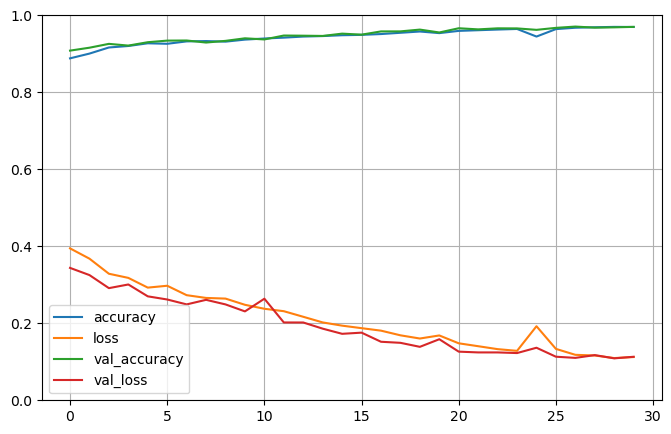

In [90]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**On observe ici que le modèle généralise bien avec la courbe de validation qui suit la courbe d'accuracy. Il n'y a donc pas de sur-apprentissage. On peut néanmoins constater un peu de bruit au niveau de la loss de la validation, ce qui peut s'expliquer avec l'optimiseur et le dropOut utilisés.**

## **Comparaison Finale et conclusion**

In [112]:
from sklearn.metrics import classification_report

y_pred_mlp = model_mlp.predict(X_test) > 0.5
y_pred_lstm = best_model.predict(X_test_lstm) > 0.5

print("MLP :")
print(classification_report(y_test, y_pred_mlp))

print("LSTM :")
print(classification_report(y_test, y_pred_lstm))

548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
MLP :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     14494
           1       0.94      0.54      0.69       445
           2       0.95      0.80      0.87      1158
           3       0.80      0.27      0.41       128
           4       0.99      0.92      0.95      1286

   micro avg       0.97      0.96      0.96     17511
   macro avg       0.93      0.71      0.78     17511
weighted avg       0.97      0.96      0.96     17511
 samples avg       0.96      0.96      0.96     17511

LSTM :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14494
           1       0.81      0.57      0.67       445
           2       0.88      0.92      0.90      1158
           3       0.79      0.48      0.60       128
           4       0.97      0.95      0.96      1286

   micro avg       0.97      0.97      0.97     17511
   macro avg       0.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Au global on obtient des résultats tout à fait convenables et similaires avec les deux modèles. Voici notre analyse du classification_report :**

**- Micro avg de 97% pour les deux : Très bon score , nos modèles sont globalement performants**

**- Macro-avg : moyenne non pondérée par classe, on peut voir que certaines classes ont un recall très faible (RBBB par exemple).**

**-> Cela nous montre un déséquilibre entre nos classes**

**- Weighted average : moyenne pondérée par classe, il est élevé ici (96% et 97%).**

**-> Nos modèles font bien sur les classes majoritaires**

**Essayons maintenant d'un peu plus comparer le MLP avec le LSTM. On peut tout d'abord voir que le LSTM fait mieux pour les classes minoritaires, ce qui est super important pour nous (meme si ce F1 score macro de 82% peut etre amélioré).**

**Le LSTM gère mieux la variabilité temporelle et est donc plus robuste que le MLP pour les classes rares**

**En revanche, le MLP est très bon sur les classes fréquentes, mais plus rigide dès que les patterns sont moins évidents.**

**Pour conclure, si il y a avait à choisir un modèle pour dans notre étude de cas d'analyse d'ECG, on choisirait le réseau de neurones récurents, le LSTM. En effet, on a pu constater qu'il semble plus adapté que le MLP pour les séries temporelles (comme les ECG).**